# Fraud Detection Algorithm for Banks

As a data scientist at JPMorgan Chase & Co., you have been asked to design a fraud detection algorithm for identifying the cases of fraud in the bank database. 
You decide to use the Mamdani fuzzy inference process for the same. 

**Input parameters:**

- Age of the account-holder
- Salary of the account-holder
- Pending Loan-Amount of the account holder

**Output parameters:**

- Probability of the current case being a fraud 

The definition for all the variables and their classes are as follows:

* Age of the account-holder
   - Young
   - Middle-aged 
   - Old-age
   
* Salary of the account-holder
   - Low salary range 
   - Medium salary range 
   - High salary range 
   
* Pending loan amount of the account holder
   - Low amount 
   - Medium amount 
   - High amount
   
* Fraud probability
   - Low probability 
   - Medium probability 
   - High probability 
   
The rules which are to be used for inference are as follows:

```
1. IF age==high AND salary==low THEN probability of fraud=high
2. IF age==low AND salary==high THEN probability of fraud=low
3. IF age==middle OR loan amount==middle THEN probability of fraud=medium
```

## Graded Components

You will be implementing the following functions in this notebook

-  **line(a, b, x)** 1 Marks
-  **up(a, b, x)** 1.5 Mark
-  **down(a, b, x)** 1 Marks
-  **triangle(a, b, x)** 1.5 Mark
-  **trapezoid(a, b, c, d, x)** 1 Mark
-  **def calculate_rule_strength(memberships)** 1 Marks
-  **def get_output_fuzzy_set(age, salary, loan_amount, X)** 2 Marks 
-  **get_centroid(X, Y)** 1 Mark

**Super Important: Whenever required to return an array in any function make sure its a numpy array. To convert a python list to a numpy array, use np.array(A) where A is a python list**

In [36]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

In [42]:
# Utility function to check if a variable is a lambda
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

In [43]:
# Utility function to plot membership functions
def plot_membership_func(membership_func, plot_range, title='', legends=('Low', 'Medium', 'High')):
    x = np.arange(*plot_range)
    
    memberships = [membership_func(k) for k in x]
    low = [membership['low'] for membership in memberships]
    medium = [membership['medium'] for membership in memberships]
    high = [membership['high'] for membership in memberships]
    
    fig = plt.figure()
    
    ax = fig.gca()
    
    handles = plt.plot(x, low, x, medium, x, high)
    plt.figlegend(handles=handles, labels=legends, loc='upper right')
    plt.title(title)
    plt.show()

## Task 1

Write a lambda to return $y$ for straight line $y(x)$ given $a, b, x$ where,

$$y(a) = 0 $$
$$y(b) = 1 $$

In [64]:
# Graded component 1:

# Implement a lambda, `line` which takes three numbers a, b, x as input and returns y according
# to the equations given above. 

line = None

### BEGIN SOLUTION
line = lambda a, b, x: (x - a) / (b - a)
### END SOLUTION

In [65]:
#SAMPLE TEST CASE
print("Running Sample Test Case")
output = line(0, 10, 5)
answer = 0.5
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(line)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [127]:
#Hidden Test cases

### BEGIN HIDDEN TESTS
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

# Hidden test case 1
output = line(0, 9, 5)
answer = 0.555555
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(line)

# Hidden test case 2
output = line(11, 9, 5)
answer = 3
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(line)

# Hidden test case 3
output = line(11, 20, 30)
answer = 2.11111
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(line)
### END HIDDEN TESTS

# Task 2

Write a lambda to return $y$ given $a, b, x$ where,

$$ y(x) = \begin{cases}
0 & x \le a \\
\frac{x - a}{b - a} & x > a, x < b \\
1 & x \ge b \end{cases} $$

In [104]:
# Graded component 2:

# Implement a lambda, `up` which takes three numbers a, b, x as input and returns y according
# to the equations given above.

# Hint: Use the `line` lambda defined eariler.

up = None

### BEGIN SOLUTION
up = lambda a, b, x: min(max(line(a, b, x), 0.0), 1.0)
### END SOLUTION

In [81]:
#SAMPLE TEST CASE
print("Running Sample Test Case")
output = up(4, 6, 7)
answer = 1
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(up)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [126]:
#Hidden Test cases

### BEGIN HIDDEN TESTS
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

# Hidden test case 1
output = up(0, 9, 5)
answer = 0.555555
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(up)

# Hidden test case 2
output = up(8, 9, 5)
answer = 0
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(up)

# Hidden test case 3
output = up(11, 20, 13)
answer = 0.222222
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(up)
### END HIDDEN TESTS

# Task 3

Write a lambda to return $y$ given $a, b, x$ where,

$$ y(x) = \begin{cases}
1 & x \le a \\
\frac{x - b}{a - b} & x > a, x < b \\
0 & x \ge b \end{cases} $$

In [103]:
# Graded component 3:

# Implement a lambda, `down` which takes three numbers a, b, x as input and returns y according
# to the equations given above. 

# Hint: Use the `up` lambda defined earlier.

down = None

### BEGIN SOLUTION
down =  lambda a, b, x: 1. - up(a, b, x)
### END SOLUTION

In [99]:
#SAMPLE TEST CASE
print("Running Sample Test Case")
output = down(4, 6, 7)
answer = 0
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(down)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [125]:
#Hidden Test cases

### BEGIN HIDDEN TESTS
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

# Hidden test case 1
output = down(0, 9, 5)
answer = 0.444444
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(down)

# Hidden test case 2
output = down(8, 9, 5)
answer = 1
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(down)

# Hidden test case 3
output = down(11, 20, 13)
answer = 0.777777
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(down)
### END HIDDEN TESTS

# Task 4

Write a lambda to return $y$ given $a, b, x$ where,


$$m = \frac{a + b}{2}$$
$$ y(x) = \begin{cases}
0 & x \le a \\
\frac{x - a}{m - a} & x > a, x < m \\
\frac{x - m}{b - m} & x \ge m, x < b \\
0 & x \ge b \end{cases} $$

In [128]:
# Graded component 4:

# Implement a lambda, `triangle` which takes three numbers a, b, x as input and returns y according
# to the equations given above. 

# Hint: Use the `up` and `down` lambdas defined earlier.

triangle = None

### BEGIN SOLUTION
triangle = lambda a, b, x: min(up(a, (a + b)/2, x), down((a + b)/2, b, x))
### END SOLUTION

In [129]:
#SAMPLE TEST CASE
print("Running Sample Test Case")
output = triangle(4, 6, 4.5)
answer = 0.5
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(triangle)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [130]:
#Hidden Test cases

### BEGIN HIDDEN TESTS
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

# Hidden test case 1
output = triangle(7, 13, 10)
answer = 1
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(triangle)

# Hidden test case 2
output = triangle(9, 14, 11)
answer = 0.8
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(triangle)

# Hidden test case 3
output = triangle(10, 20, 13)
answer = 0.6
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(triangle)

# Hidden test case 4
output = triangle(10, 20, 9)
answer = 0
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(triangle)


# Hidden test case 5
output = triangle(10, 20, 21)
answer = 0
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(triangle)
### END HIDDEN TESTS

# Task 5

Write a lambda to return $y$ given $a, b, c, d, x$ where,

$$ y(x) = \begin{cases}
0 & x \le a \\
\frac{x - a}{b - a} & x > a, x < b \\
1 & x \ge b, x < c \\
\frac{x - d}{d - c} & x \ge c, x < d \\
0 & x \ge d \end{cases} $$

In [151]:
# Graded component 5:

# Implement a lambda, `trapezoid` which takes three numbers a, b, x as input and returns y according
# to the equations given above. 

# Hint: Use the `up` and `down` lambdas defined earlier.

trapezoid = None

### BEGIN SOLUTION
trapezoid = lambda a, b, c, d, x: min(up(a, b, x), down(c, d, x))
### END SOLUTION

In [142]:
#SAMPLE TEST CASE
print("Running Sample Test Case")
output = trapezoid(4, 5, 6, 7, 4.5)
answer = 0.5
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(trapezoid)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [143]:
#Hidden Test cases

### BEGIN HIDDEN TESTS
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

# Hidden test case 1
output = trapezoid(7, 10, 12, 17, 4.5)
answer = 0
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(trapezoid)

# Hidden test case 2
output = trapezoid(7, 10, 12, 17, 9)
answer = 0.66666
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(trapezoid)

# Hidden test case 3
output = trapezoid(7, 10, 12, 17, 11)
answer = 1
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(trapezoid)

# Hidden test case 4
output = trapezoid(7, 10, 12, 17, 13)
answer = 0.8
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(trapezoid)


# Hidden test case 5
output = trapezoid(9, 31, 47, 100, 67)
answer = 0.6226415094339622
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(trapezoid)
### END HIDDEN TESTS

In [144]:
# Fuzzy membership function for salary ranges
def salary_membership_func(x):

    x = float(x)
    
    membership = {}

    membership['low'] = down(4, 6, x)
    membership['medium'] = triangle(5, 11, x)
    membership['high'] = up(9, 11, x)
    
    return membership

<IPython.core.display.Javascript object>


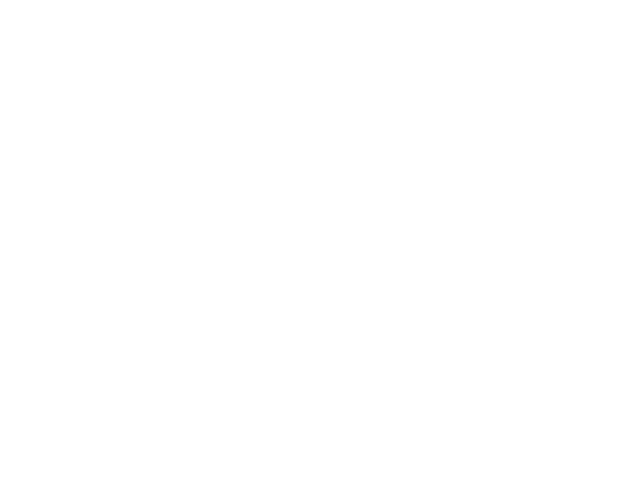

In [145]:
plot_membership_func(salary_membership_func, (0, 15, 1), title='Salary of the Account-Holder')

In [15]:
# Fuzzy membership function for pending loan amount ranges
def loan_amount_membership_func(x):
    
    x = float(x)
    
    membership = {}

    membership['low'] = down(15, 30, x)
    membership['medium'] = trapezoid(15, 30, 40, 50, x)
    membership['high'] = up(35, 60, x)
    
    return membership

<IPython.core.display.Javascript object>


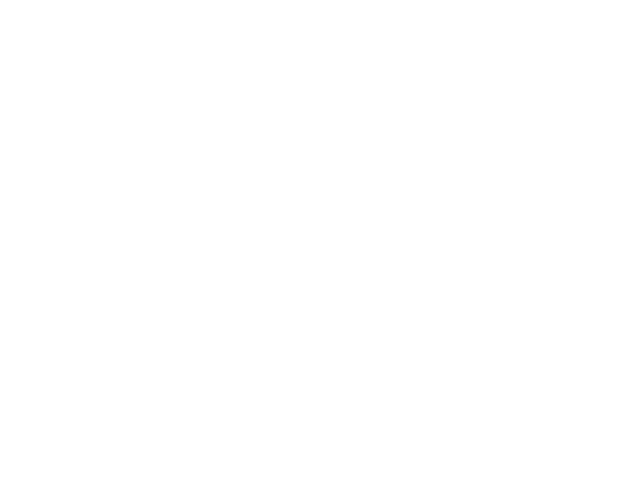

In [146]:
plot_membership_func(loan_amount_membership_func, (0, 70, 1), title='Pending Loan Amount')

In [19]:
# Fuzzy membership function for age ranges of account holder
def age_membership_func(x):

    x = float(x)
    
    membership = {}
    
    membership['low'] = down(35, 40, x)
    membership['medium'] = triangle(30.0, 55.0, x)
    membership['high'] = up(45, 55, x)
        
    return membership

<IPython.core.display.Javascript object>


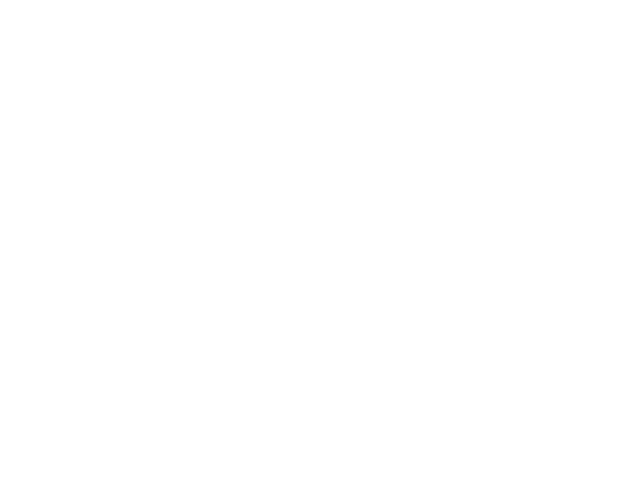

In [147]:
plot_membership_func(age_membership_func, (0, 90, 0.5), title='Age of the Account-Holder', 
                     legends=('Young', 'Middle-Age', 'Old'))

In [148]:
# Fuzzy membership function for fraud probablities
def fraud_prob_membership_func(x):

    x = float(x)
    
    membership = {}

    membership['low'] = down(0.25, 0.6, x)
    membership['medium'] = trapezoid(0.25, 0.4, 0.6, 0.75, x)
    membership['high'] = up(0.5, 0.65, x)
    
    return membership

<IPython.core.display.Javascript object>


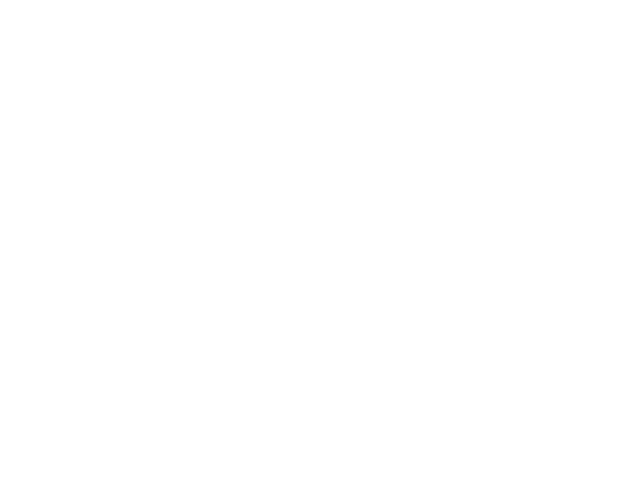

In [149]:
plot_membership_func(fraud_prob_membership_func, (0, 1, 0.05), title='Probablity of fraud')

## Task 6

Implement function `calculate_rule_strength` which takes `memberships` as input and returns a dictionary containing rule strengths.

`memberships` is defined as,

```py
memberships ={
    'age': age_membership_func(age),
    'salary': salary_membership_func(salary),
    'loan_amount': loan_amount_membership_func(loan_amount)
}
```

The output dictionary should contain three key-value pairs corrosponding to following rules,

- `low`: 

    `IF age==low AND salary==high THEN probability of fraud=low`
    

- `medium`: 

    `IF age==middle OR loan amount==middle THEN probability of fraud=medium`


- `high`: 

    `IF age==high AND salary==low THEN probability of fraud=high`
    
![](rule.png)

In [152]:
# Graded component 6:

def calculate_rule_strength(memberships):
    
    rule_strength = {}
    
    # IF age==low AND salary==high THEN probability of fraud=low
    rule_strength['low'] = None
    # IF age==middle OR loan amount==middle THEN probability of fraud=medium
    rule_strength['medium'] = None
    # IF age==high AND salary==low THEN probability of fraud=high
    rule_strength['high'] = None
    
    ### BEGIN SOLUTION
    rule_strength['low'] = min(memberships['age']['low'], memberships['salary']['high'])
    rule_strength['medium'] = max(memberships['age']['medium'], memberships['loan_amount']['medium'])
    rule_strength['high'] = min(memberships['age']['high'], memberships['salary']['low'])
    ### END SOLUTION
    
    return rule_strength

In [196]:
#SAMPLE TEST CASE
print("Running Sample Test Case")

memberships ={
    'age': age_membership_func(35),
    'salary': salary_membership_func(10.5),
    'loan_amount': loan_amount_membership_func(12.5)
}

output = calculate_rule_strength(memberships)
answer = {'high': 0.0, 'low': 0.75, 'medium': 0.4}

assert sum([np.allclose(output[x], answer[y], rtol=1e-05, atol=1e-06) for x, y in zip(sorted(output), sorted(answer))]) == 3
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [197]:
#Hidden Test cases

### BEGIN HIDDEN TESTS

# Hidden test case 1
memberships ={
    'age': age_membership_func(5),
    'salary': salary_membership_func(50),
    'loan_amount': loan_amount_membership_func(2)
}

output = calculate_rule_strength(memberships)
answer = {'high': 0.0, 'low': 1.0, 'medium': 0.0}

assert sum([np.allclose(output[x], answer[y], rtol=1e-05, atol=1e-06) for x, y in zip(sorted(output), sorted(answer))]) == 3

# Hidden test case 2
memberships ={
    'age': age_membership_func(40),
    'salary': salary_membership_func(10),
    'loan_amount': loan_amount_membership_func(10)
}

output = calculate_rule_strength(memberships)
answer = {'high': 0.0, 'low': 0.0, 'medium': 0.8}

assert sum([np.allclose(output[x], answer[y], rtol=1e-05, atol=1e-06) for x, y in zip(sorted(output), sorted(answer))]) == 3

# Hidden test case 3
memberships ={
    'age': age_membership_func(37),
    'salary': salary_membership_func(20),
    'loan_amount': loan_amount_membership_func(7)
}

output = calculate_rule_strength(memberships)
answer = {'high': 0.0, 'low': 0.6, 'medium': 0.56}

assert sum([np.allclose(output[x], answer[y], rtol=1e-05, atol=1e-06) for x, y in zip(sorted(output), sorted(answer))]) == 3
### END HIDDEN TESTS

# Task 7

Implement function `get_output_fuzzy_set`, which takes age, salary, pending loan amount and X as input. X is a NumPy array conatining the values for which we calculate output fuzzy set. Return a NumPy array containing the values of output fuzzy set corrosponding to each value in X.

![](fuzzy_inf.png)

In [198]:
# Graded component 7:

# Function to caluclate output fuzzy set
def get_output_fuzzy_set(age, salary, loan_amount, X):
    
    memberships ={
        'age': age_membership_func(age),
        'salary': salary_membership_func(salary),
        'loan_amount': loan_amount_membership_func(loan_amount)
    }
    
    # Get rule strengths     
    rule_strength = calculate_rule_strength(memberships)

    ### BEGIN SOLUTION
    # Calculate value of original membership function
    fraud_probs = [fraud_prob_membership_func(x) for x in X]
    
    # For each range take min with rule strength
    for fraud_prob in fraud_probs:
        for rule in fraud_prob.keys():
            fraud_prob[rule] = np.clip(fraud_prob[rule], 0, rule_strength[rule])

    # Aggregate all rules     
    output_fuzzy_set = np.array([max(fraud_prob['low'], fraud_prob['medium'], fraud_prob['high']) 
                        for fraud_prob in fraud_probs])
    
    ### END SOLUTION
    return output_fuzzy_set

<IPython.core.display.Javascript object>


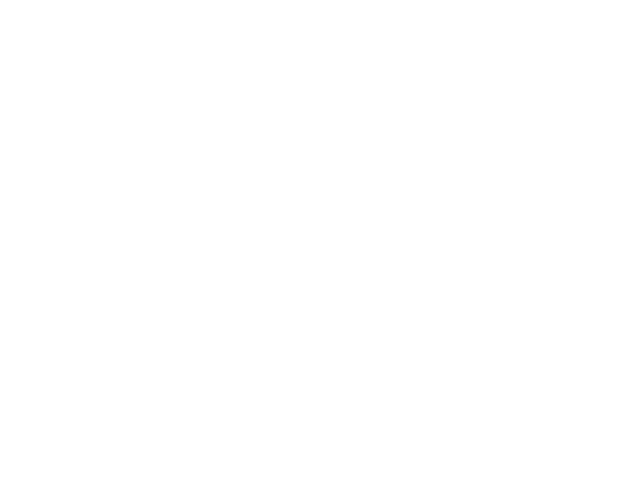

In [199]:
# Plot the output set
fig = plt.figure()
ax = fig.gca()
plt.plot(get_output_fuzzy_set(35, 10.5, 12.5, np.arange(0, 1, 0.01)))
plt.title("Net Output Fuzzy Set")
plt.show()

In [182]:
#SAMPLE TEST CASE
print("Running Sample Test Case")

output = get_output_fuzzy_set(35, 10.5, 12.5, np.arange(0, 1, 0.01))
answer = np.array([0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.74285714,
       0.71428571, 0.68571429, 0.65714286, 0.62857143, 0.6       ,
       0.57142857, 0.54285714, 0.51428571, 0.48571429, 0.45714286,
       0.42857143, 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [200]:
#Hidden Test cases

### BEGIN HIDDEN TESTS

# Hidden test case 1
output = get_output_fuzzy_set(5, 50, 2, np.arange(0, 1, 0.01))
answer = np.array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97142857, 0.94285714, 0.91428571, 0.88571429,
       0.85714286, 0.82857143, 0.8       , 0.77142857, 0.74285714,
       0.71428571, 0.68571429, 0.65714286, 0.62857143, 0.6       ,
       0.57142857, 0.54285714, 0.51428571, 0.48571429, 0.45714286,
       0.42857143, 0.4       , 0.37142857, 0.34285714, 0.31428571,
       0.28571429, 0.25714286, 0.22857143, 0.2       , 0.17142857,
       0.14285714, 0.11428571, 0.08571429, 0.05714286, 0.02857143,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)

# Hidden test case 2
output = get_output_fuzzy_set(40, 10, 10, np.arange(0, 1, 0.01))
answer = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.8       ,
       0.8       , 0.8       , 0.8       , 0.8       , 0.73333333,
       0.66666667, 0.6       , 0.53333333, 0.46666667, 0.4       ,
       0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)

# Hidden test case 3
output = get_output_fuzzy_set(37, 20, 7, np.arange(0, 1, 0.01))
answer = np.array([0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
       0.57142857, 0.56      , 0.56      , 0.56      , 0.56      ,
       0.56      , 0.56      , 0.56      , 0.56      , 0.56      ,
       0.56      , 0.56      , 0.56      , 0.56      , 0.56      ,
       0.56      , 0.56      , 0.56      , 0.56      , 0.56      ,
       0.56      , 0.56      , 0.56      , 0.56      , 0.56      ,
       0.56      , 0.56      , 0.53333333, 0.46666667, 0.4       ,
       0.33333333, 0.26666667, 0.2       , 0.13333333, 0.06666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
### END HIDDEN TESTS

## Task 8

Write a lambda which takes two NumPy arrays $X, Y$ as input and return centroid given by formula,

$$ \text{Centroid}  = \frac{\sum_{i=1}^{n} X_i * Y_i}{\sum_{i=1}^{n} X_i} $$

In [191]:
# Graded component 8:

# Implement a lambda, `line` which takes three numbers a, b, x as input and returns y according
# to the equations given above. 

get_centroid = None

### BEGIN SOLUTION
get_centroid = lambda X, Y : np.sum(X * Y) / np.sum(X)
### END SOLUTION

In [206]:
#SAMPLE TEST CASE
print("Running Sample Test Case")
output = get_centroid(np.array([1, 2, 3]), np.array([4, 5, 6])) 
answer = 5.333333
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(get_centroid)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [207]:
#Hidden Test cases

### BEGIN HIDDEN TESTS
def is_lambda(v):
  LAMBDA = lambda:0
  return isinstance(v, type(LAMBDA)) and v.__name__ == LAMBDA.__name__

# Hidden test case 1
output = get_centroid(np.array([1, 2, 3]), np.array([42, 51, 64])) 
answer = 56
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(get_centroid)

# Hidden test case 2
output = get_centroid(np.array([11, 23, 32]), np.array([4, 5, 6])) 
answer = 5.318181818181818
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(get_centroid)

# Hidden test case 3
output = get_centroid(np.array([15, 21, 37]), np.array([42, 51, 64])) 
answer = 55.73972602739726
assert np.allclose(output, answer, rtol=1e-05, atol=1e-06)
assert is_lambda(get_centroid)
### END HIDDEN TESTS

In [208]:
# Infer probablity of fraud using fuzzy inference
def infer_fraud_prob(age, salary, loan_amount):
    X = np.arange(0, 1, 0.01)
    Y = get_output_fuzzy_set(age, salary, loan_amount, X)
    
    return get_centroid(X, Y)

<IPython.core.display.Javascript object>


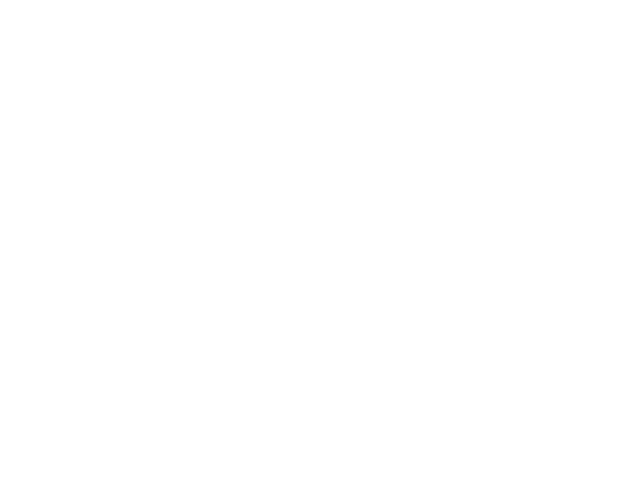

In [210]:
# Lets visualize the inference funnction as a 3D scatter plot

age_range = np.arange(0, 100, 10)
salary_range = np.arange(0, 20, 1)
loan_amount_range = np.arange(0, 80, 10)

X = np.array(np.meshgrid(age_range, salary_range, loan_amount_range)).T.reshape(-1,3)
y = np.array([infer_fraud_prob(*x) for x in X])

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y)

ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Loan Amount')

fig.show()